In [26]:
import pandas as pd
import sys


sys.path.append('../../')
from src.plot_helpers import plot_experiment_range,plot_correlation_matrix
from src.transform import transform_diff_avg,load_json

inbiot_cols = load_json("../../json/locations.json")["inbiot"]

## Load data

In [27]:
df = pd.read_csv('../../data/clean_data/all_sensors.csv',index_col=0,parse_dates=True)
df

/tmp/ipykernel_2032813/2544046345.py:1: DtypeWarning:

Columns (7,27) have mixed types. Specify dtype option on import or set low_memory=False.



Unnamed: 0  aqi_palas  averaging       cn  co      co2  \
datetime                                                                      
2024-10-11 13:24:18         NaN        NaN        NaN      NaN NaN   566.00   
2024-10-11 13:33:57         NaN        NaN        NaN      NaN NaN   528.00   
2024-10-11 13:43:57         NaN        NaN        NaN      NaN NaN   596.00   
2024-10-11 13:44:34         NaN        NaN        NaN      NaN NaN   675.00   
2024-10-11 13:54:27         NaN        NaN        NaN      NaN NaN   701.00   
...                         ...        ...        ...      ...  ..      ...   
NaT                       179.0      56.47       60.0  1112.10 NaN   996.77   
NaT                       180.0      58.78       60.0  1140.10 NaN  1025.73   
NaT                       181.0      60.80       60.0  1142.41 NaN  1034.32   
NaT                       182.0      62.53       60.0  1154.18 NaN  1011.70   
NaT                       183.0      64.23       60.0  1176.39 NaN  1005.20   

                     dcn  formaldehyde  global_error  humidity  ...  \
datetime                                                        ...   
2024-10-11 13:24:18  NaN           3.0           NaN     58.00  ...   
2024-10-11 13:33:57  NaN          11.0           NaN     58.00  ...   
2024-10-11 13:43:57  NaN          36.0           NaN     57.00  ...   
2024-10-11 13:44:34  NaN          42.0           NaN     57.00  ...   
2024-10-11 13:54:27  NaN          41.0           NaN     57.00  ...   
...                  ...           ...           ...       ...  ...   
NaT                   ->           NaN           0.0     51.54  ...   
NaT                   ->           NaN           0.0     50.25  ...   
NaT                   ->           NaN           0.0     51.30  ...   
NaT                   ->           NaN           0.0     48.37  ...   
NaT                   ->           NaN           0.0     48.76  ...   

                     temperature   tvoc  tvoc_ppb   voc  volume_flow  x10_dcn  \
datetime                                                                        
2024-10-11 13:24:18        20.50    0.0       NaN   NaN          NaN      NaN   
2024-10-11 13:33:57        21.00   87.0       NaN   NaN          NaN      NaN   
2024-10-11 13:43:57        22.20  103.0       NaN   NaN          NaN      NaN   
2024-10-11 13:44:34        22.70  103.0       NaN   NaN          NaN      NaN   
2024-10-11 13:54:27        23.00  102.0       NaN   NaN          NaN      NaN   
...                          ...    ...       ...   ...          ...      ...   
NaT                        22.17    NaN       NaN  0.06          1.0     0.19   
NaT                        22.78    NaN       NaN  0.09          1.0     0.19   
NaT                        23.02    NaN       NaN  0.09          1.0     0.19   
NaT                        23.13    NaN       NaN  0.07          1.0     0.19   
NaT                        22.68    NaN       NaN  0.03          1.0     0.19   

                     x16_dcn  x50_dcn  x84_dcn  x90_dcn  
datetime                                                 
2024-10-11 13:24:18      NaN      NaN      NaN      NaN  
2024-10-11 13:33:57      NaN      NaN      NaN      NaN  
2024-10-11 13:43:57      NaN      NaN      NaN      NaN  
2024-10-11 13:44:34      NaN      NaN      NaN      NaN  
2024-10-11 13:54:27      NaN      NaN      NaN      NaN  
...                      ...      ...      ...      ...  
NaT                      0.2     0.24      0.3     0.34  
NaT                      0.2     0.24      0.3     0.33  
NaT                      0.2     0.24      0.3     0.33  
NaT                      0.2     0.24      0.3     0.33  
NaT                      0.2     0.24      0.3     0.33  

[964776 rows x 38 columns]

In [28]:
df_inbiot = df.loc[df['sensor'] == 'inbiot'][inbiot_cols]
df_inbiot = df_inbiot.sort_index()
df_inbiot

temperature  humidity    co2  formaldehyde   tvoc  \
datetime                                                                 
2024-10-11 13:24:18         20.5      58.0  566.0           3.0    0.0   
2024-10-11 13:33:57         21.0      58.0  528.0          11.0   87.0   
2024-10-11 13:43:57         22.2      57.0  596.0          36.0  103.0   
2024-10-11 13:44:34         22.7      57.0  675.0          42.0  103.0   
2024-10-11 13:54:27         23.0      57.0  701.0          41.0  102.0   
...                          ...       ...    ...           ...    ...   
2024-10-31 10:43:52         24.3      54.0  734.0          54.0  498.0   
2024-10-31 10:53:52         24.2      54.0  718.0          47.0  498.0   
2024-10-31 11:03:52         24.1      54.0  703.0          45.0  498.0   
2024-10-31 11:13:52         23.7      52.0  619.0          40.0  490.0   
2024-10-31 11:23:52         23.7      55.0  630.0          40.0  487.0   

                     pm_1.0  pm_4.0  pm_10  pm_2.5  
datetime                                            
2024-10-11 13:24:18     1.0     1.0    1.0     1.0  
2024-10-11 13:33:57     1.0     1.0    1.0     1.0  
2024-10-11 13:43:57     1.0     1.0    1.0     1.0  
2024-10-11 13:44:34     1.0     1.0    1.0     1.0  
2024-10-11 13:54:27     1.0     1.0    1.0     1.0  
...                     ...     ...    ...     ...  
2024-10-31 10:43:52    32.0    34.0   34.0    34.0  
2024-10-31 10:53:52    31.0    32.0   32.0    32.0  
2024-10-31 11:03:52    28.0    29.0   29.0    29.0  
2024-10-31 11:13:52    20.0    21.0   21.0    21.0  
2024-10-31 11:23:52    18.0    19.0   19.0    19.0  

[2882 rows x 9 columns]

In [29]:
df_inbiot["2024-10-16 08:15":"2024-10-16 10:15"]

temperature  humidity    co2  formaldehyde   tvoc  \
datetime                                                                 
2024-10-16 08:24:56         23.3      56.0  973.0          45.0  188.0   
2024-10-16 08:34:56         23.2      56.0  968.0          45.0  185.0   
2024-10-16 08:44:56         23.3      56.0  962.0          45.0  183.0   
2024-10-16 08:54:56         23.3      56.0  957.0          45.0  181.0   
2024-10-16 09:04:56         23.3      56.0  951.0          45.0  179.0   
2024-10-16 09:14:56         23.3      56.0  944.0          43.0  177.0   
2024-10-16 09:24:56         22.9      49.0  683.0          37.0   66.0   
2024-10-16 09:34:56         21.9      46.0  412.0          40.0    5.0   
2024-10-16 09:44:56         21.4      46.0  401.0          33.0    5.0   
2024-10-16 09:54:56         21.2      47.0  402.0          25.0    5.0   
2024-10-16 10:04:56         21.6      48.0  407.0          22.0    7.0   
2024-10-16 10:14:56         21.9      50.0  423.0          22.0   13.0   

                     pm_1.0  pm_4.0  pm_10  pm_2.5  
datetime                                            
2024-10-16 08:24:56    37.0    39.0   40.0    39.0  
2024-10-16 08:34:56    37.0    40.0   40.0    39.0  
2024-10-16 08:44:56    36.0    38.0   38.0    38.0  
2024-10-16 08:54:56    36.0    38.0   38.0    38.0  
2024-10-16 09:04:56    37.0    38.0   38.0    38.0  
2024-10-16 09:14:56    36.0    38.0   38.0    38.0  
2024-10-16 09:24:56    16.0    17.0   17.0    17.0  
2024-10-16 09:34:56     4.0     4.0    4.0     4.0  
2024-10-16 09:44:56     5.0     5.0    5.0     5.0  
2024-10-16 09:54:56     4.0     5.0    5.0     5.0  
2024-10-16 10:04:56     5.0     5.0    5.0     5.0  
2024-10-16 10:14:56     6.0     6.0    6.0     6.0

## Correlation matrix

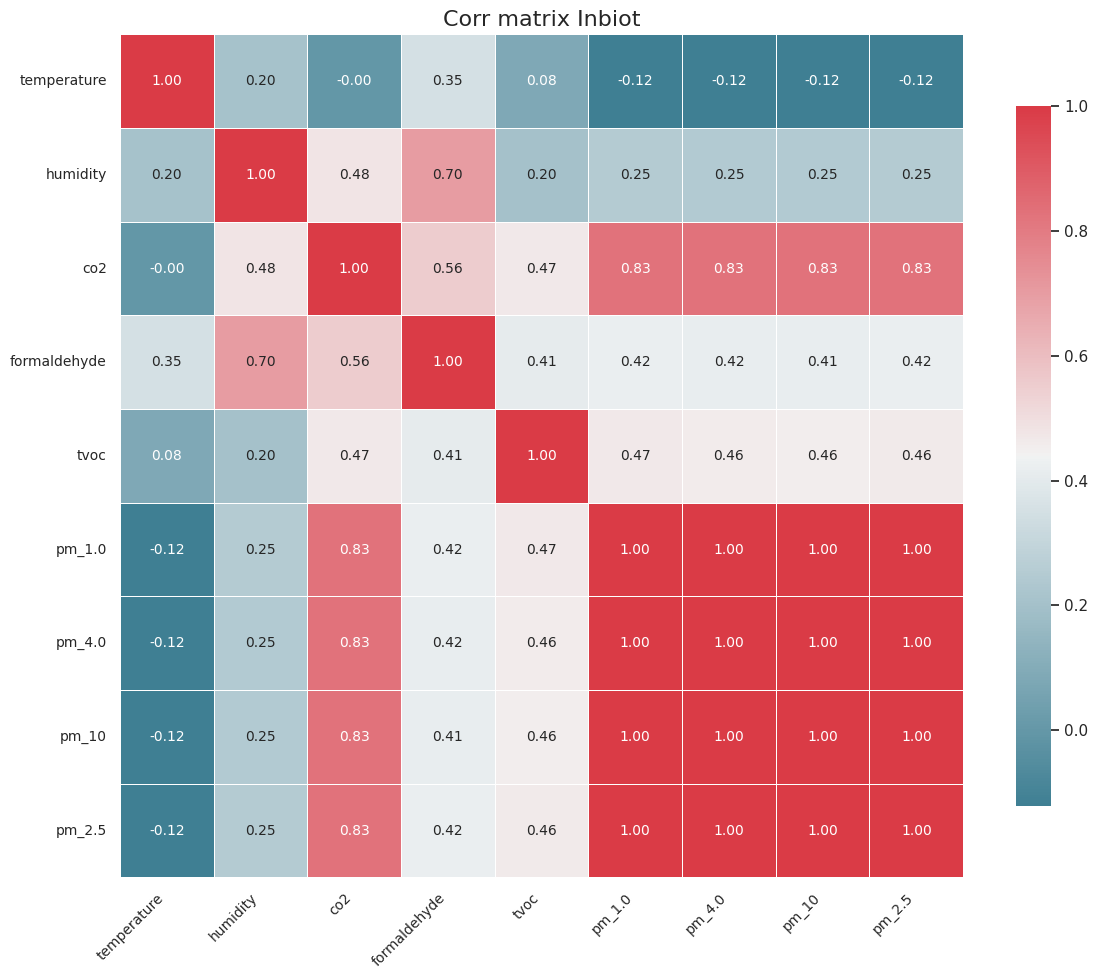

In [30]:
plot_correlation_matrix(df=df_inbiot.corr(),title=f"Corr matrix Inbiot")

## PAHs

### Time series plots

In [31]:
plot_experiment_range(df=df_inbiot,col_names=['pm_10','pm_1.0','pm_4.0','pm_2.5'],start_date="2024-10-21 07:15",end_date="2024-10-31 07:15",max_value=100)


### Diff plot

In [8]:
plot_experiment_range(df=df_inbiot.diff(),col_names=['pm_10','pm_1.0','pm_4.0','pm_2.5'],start_date="2024-10-21 07:15",end_date="2024-10-31 07:15")

### diff percentage plot

In [9]:
plot_experiment_range(df=df_inbiot.pct_change() * 100,col_names=['pm_10','pm_1.0','pm_4.0','pm_2.5'],start_date="2024-10-21 07:15",end_date="2024-10-31 07:15")

## formaldehyde 

### Time Series

In [10]:
plot_experiment_range(df=df_inbiot,col_names=['formaldehyde'],start_date="2024-10-21 07:15",end_date="2024-10-31 07:15")

### diff plot

In [11]:
plot_experiment_range(df=df_inbiot.pct_change() * 100,col_names=['formaldehyde'],start_date="2024-10-21 07:15",end_date="2024-10-31 07:15")

## CO2

### Time series

In [12]:
plot_experiment_range(df=df_inbiot,col_names=['co2'],start_date="2024-10-21 07:15",end_date="2024-10-31 07:15")

### diff plot

In [13]:
plot_experiment_range(df=df_inbiot.pct_change() * 100,col_names=['co2'],start_date="2024-10-21 07:15",end_date="2024-10-31 07:15")

## TVOC, Temperature and Humidity

### time series plot

In [19]:
plot_experiment_range(df=df_inbiot,col_names=['tvoc','temperature','humidity'],start_date="2024-10-16 07:15",end_date="2024-10-31 07:15",max_value=250)



### diff plot

In [20]:
plot_experiment_range(df=df_inbiot.pct_change() * 100,col_names=['tvoc'],min_value=-100,max_value=100,start_date="2024-10-21 07:15",end_date="2024-10-31 07:15")

df_inbiot.pct_change()["tvoc"].max()

np.float64(inf)

## Overall analysis

In [21]:
diff_df = transform_diff_avg(df_inbiot)
diff_df.dropna(axis=1,inplace=True)

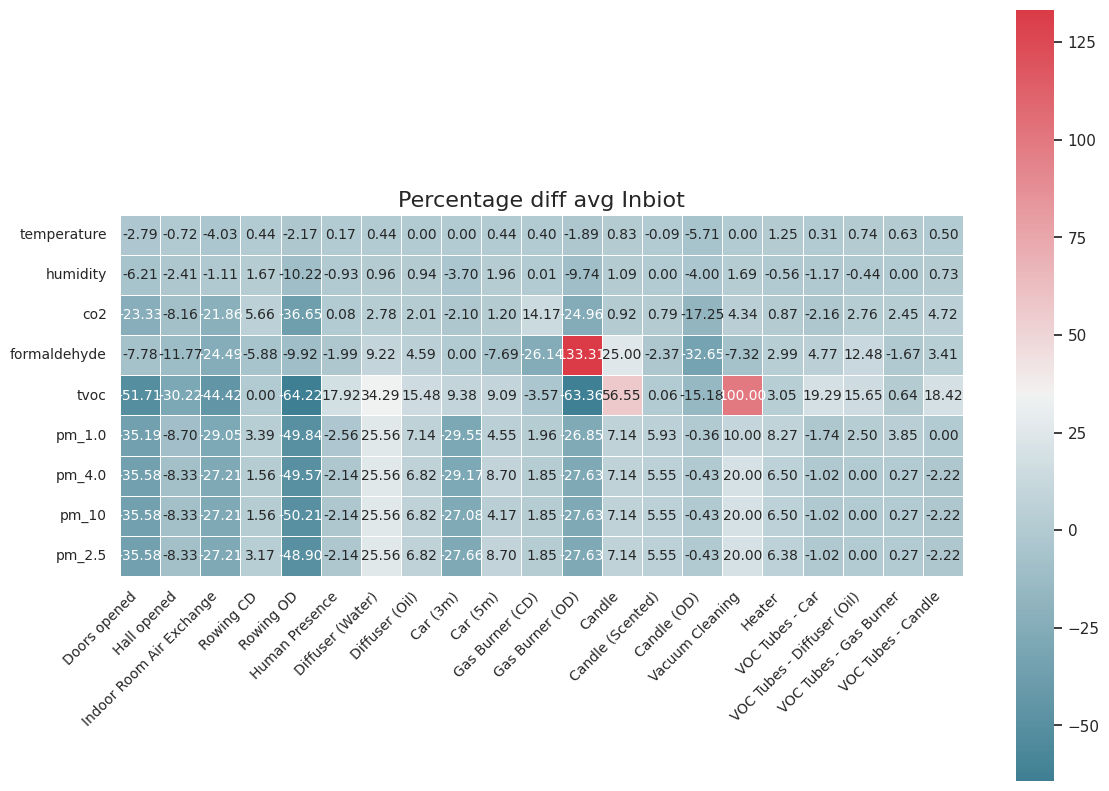

In [22]:
plot_correlation_matrix(diff_df,title="Percentage diff avg Inbiot")